<a href="https://colab.research.google.com/github/bhavikar04/BTC-USDT-trading/blob/main/BTC_USDT_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import polars as ps
import pandas as pd

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/BTCUSDT-1m-2023-11.csv')

df.drop(df.iloc[:, 5:], inplace=True, axis=1)
#del df['ignore']
#del df['taker_buy_quote_volume']
#del df['taker_buy_volume']
#del df['count']
#del df['quote_volume']
#del df['close_time']
df

,open_time,open,high,low,close
0,1698796800000,34651.4,34676.5,34650.0,34669.9
1,1698796860000,34669.9,34684.0,34637.3,34637.4
2,1698796920000,34637.4,34653.4,34632.5,34651.4
3,1698796980000,34651.3,34651.4,34608.6,34621.1
4,1698797040000,34621.1,34622.6,34592.0,34615.4
...,...,...,...,...,...
43195,1701388500000,37699.9,37701.9,37698.6,37698.6
43196,1701388560000,37698.6,37698.7,37696.0,37696.1
43197,1701388620000,37696.0,37696.1,37691.8,37691.9
43198,1701388680000,37691.9,37697.8,37691.8,37697.8


In [ ]:
#csv= pd.read_csv('/content/gdrive/MyDrive/BTCUSDT-1m-2023-11.csv')
#df = pd.DataFrame(csv[1:])
#df.columns=['open_time','open','high','low','close','volume','close_time','quote_volume','count','taker_buy_volume','taker_buy_quote_volume','ignore']
#df.drop(['volume','close_time','quote_volume','count','taker_buy_volume','taker_buy_quote_volume','ignore'],axis=1)
#df=pd.DataFrame(columns = ['open_time','open','high','low','close','volume','close_time','quote_volume','count','taker_buy_volume','taker_buy_quote_volume','ignore'])
#df = pd.concat(df,csv[1:])
#df.head()

In [ ]:
!pip install pandas_ta

from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 778.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=ce2370eac0112a92f71bb90bc1d17a00139b38b485d583e40bb4499667b046a3
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
df.head()

,open_time,open,high,low,close
0,1698796800000,34651.4,34676.5,34650.0,34669.9
1,1698796860000,34669.9,34684.0,34637.3,34637.4
2,1698796920000,34637.4,34653.4,34632.5,34651.4
3,1698796980000,34651.3,34651.4,34608.6,34621.1
4,1698797040000,34621.1,34622.6,34592.0,34615.4


In [ ]:
#df['rsi'] = df['close'].transform(lambda x: pandas_ta.rsi(close=x, length=14))
change = df['close'].diff()
df['open_time']=pd.to_datetime(df['open_time'],unit='ms')
#df['close_time']=pd.to_datetime(df['close_time'],unit='ms')
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

#
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
# taking period as 14 according to convention
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)
#rsi.head(21)

df['rsi']=rsi

# Take a look at the 20 oldest datapoints
#df.head(20)
df = df.sort_values('open_time')


In [ ]:
df['bb_low'] = df['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
#df['rsi2'] = df['close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df['bb_mid'] = df['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])
df['moving_avg'] = df['close'].rolling(20).mean()
df['EMA']=df['close'].ewm(span = 50, min_periods = 49).mean()
df

,open_time,open,high,low,close,rsi,bb_low,bb_mid,bb_high,moving_avg,EMA
0,2023-11-01 00:00:00,34651.4,34676.5,34650.0,34669.9,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-11-01 00:01:00,34669.9,34684.0,34637.3,34637.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01 00:02:00,34637.4,34653.4,34632.5,34651.4,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-11-01 00:03:00,34651.3,34651.4,34608.6,34621.1,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-01 00:04:00,34621.1,34622.6,34592.0,34615.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43195,2023-11-30 23:55:00,37699.9,37701.9,37698.6,37698.6,49.056604,10.537081,10.537520,10.537960,37702.960,37697.626856
43196,2023-11-30 23:56:00,37698.6,37698.7,37696.0,37696.1,48.088779,10.537078,10.537519,10.537961,37702.915,37697.566980
43197,2023-11-30 23:57:00,37696.0,37696.1,37691.8,37691.9,39.078947,10.537089,10.537522,10.537955,37703.020,37697.344745
43198,2023-11-30 23:58:00,37691.9,37697.8,37691.8,37697.8,44.278607,10.537098,10.537526,10.537953,37703.155,37697.362598


Calculating moving averages

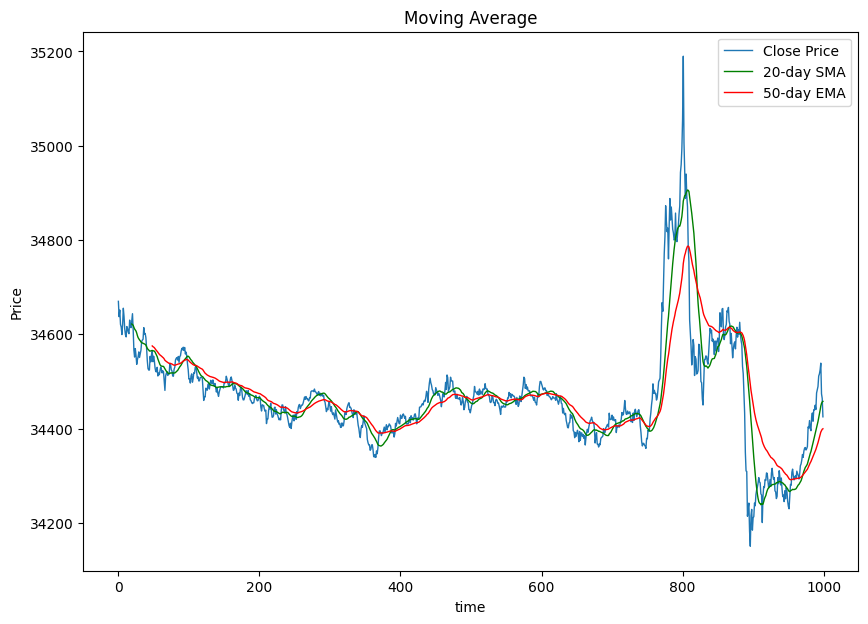

In [ ]:
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('time')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(df['close'][:1000],lw=1, label='Close Price')
plt.plot(df['moving_avg'][:1000],'g',lw=1, label='20-day SMA')
plt.plot(df['EMA'][:1000],'r', lw=1, label='50-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

Signal generation using bollinger bands

<ipython-input-11-695f6885ef44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos'][20:]=(np.where(df['close'][20:]<df['bb_low'][20:],1,0))
<ipython-input-11-695f6885ef44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos'][20:]=(np.where(df['close'][20:]>df['bb_high'][20:],-1,0))


<Axes: title={'center': 'equity curve'}>

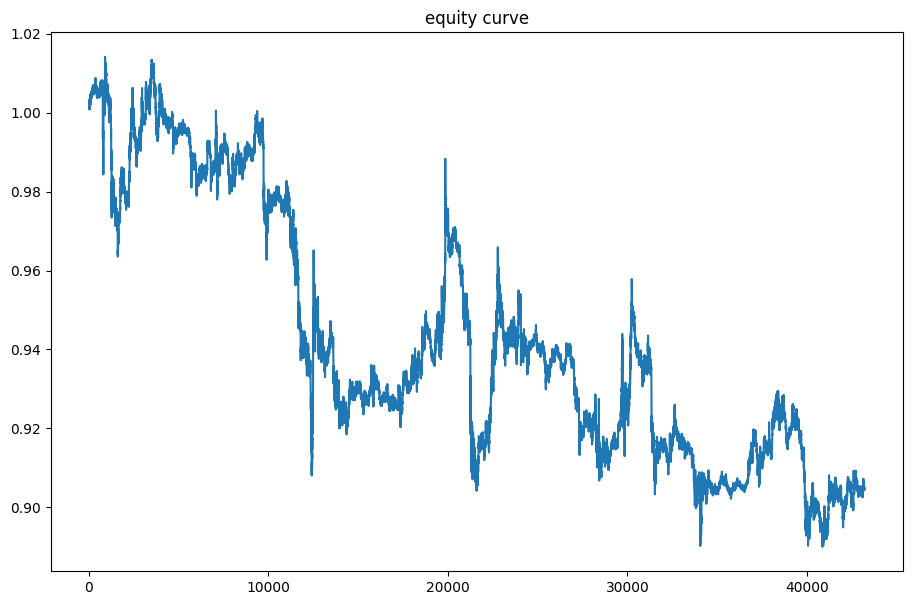

In [ ]:
df['pos']=None
df['pos'][20:]=(np.where(df['close'][20:]<df['bb_low'][20:],1,0))
df['pos'][20:]=(np.where(df['close'][20:]>df['bb_high'][20:],-1,0))
df['returns']=1 + (df['close'].pct_change()*df['pos'].shift(1))

df['returns'].cumprod().plot(figsize=(11,7),title='equity curve')

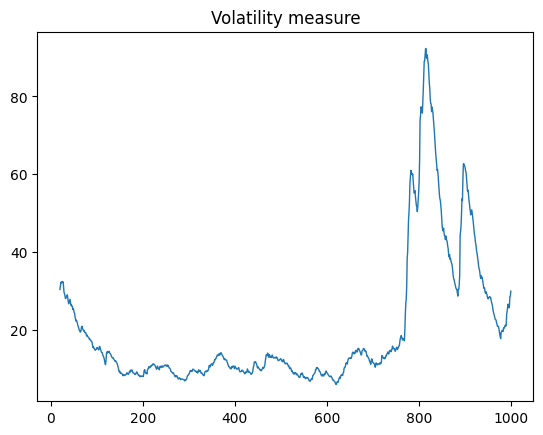

In [ ]:
df['ATR'] = df.ta.atr(length=20)
df_model = df[['rsi','bb_low','bb_mid','bb_high','moving_avg','EMA','ATR']]
plt.title("Volatility measure")
plt.plot(df['ATR'][:1000],lw=1, label='Average True Range')

Text(0.5, 1.0, 'Bollinger bands')

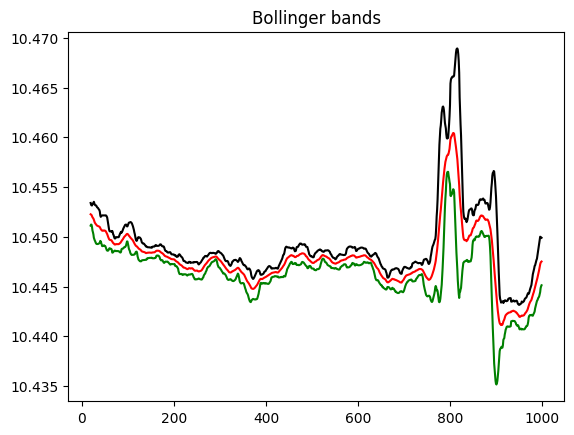

In [ ]:
plt.plot(df['bb_low'][:1000],'g',label='bb_low')
plt.plot(df['bb_mid'][:1000],'r',label='bb_mid')
plt.plot(df['bb_high'][:1000],'k',label='bb_high')
plt.title('Bollinger bands')
#plt.plot(df['ATR'][:1000],'b',label='ATR')

The peaks in volatility can be identified by looking at the above two plots

Signal generation using RSI

In [ ]:
df['regime']=0
z=1
for i in range(0,len(df)-1):
  if df['rsi'][i]<=20 and z==1:
    df['regime'][i+1]=1
    z=0
  elif df['rsi'][i]>=45 and z==0:
    df['regime'][i+1]=-1
    z=1

for i in range(1,len(df)):
  if df['regime'][i-1]==1 and df['regime'][i]==0:
    df['regime'][i]=1

<ipython-input-14-ec565dac4f72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regime'][i+1]=1
<ipython-input-14-ec565dac4f72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regime'][i+1]=-1
<ipython-input-14-ec565dac4f72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regime'][i]=1


Backtesting the strategy

In [ ]:
df['returns']=1
df['change']=df['close'].pct_change()+1
for i in range(0,len(df)):
  if df['regime'][i]!=0:
    df['returns'][i]=df['change'][i]


<ipython-input-15-a5c5f144fc15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'][i]=df['change'][i]


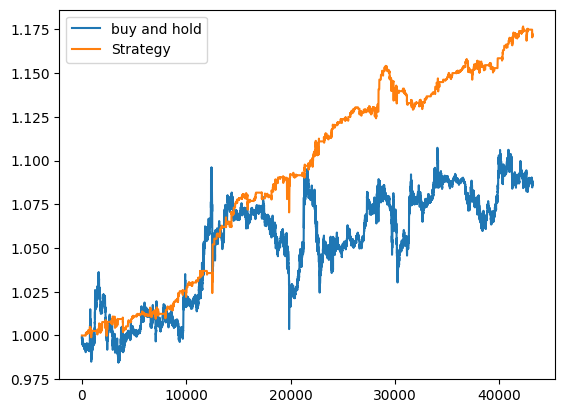

In [ ]:
df['change'].cumprod().plot(label='buy and hold')
df['returns'].cumprod().plot(label='Strategy').legend()

In [ ]:
df_model.dropna()

,rsi,bb_low,bb_mid,bb_high,moving_avg,EMA,ATR
48,43.399340,10.449147,10.450650,10.452153,34565.850,34575.291886,25.249659
49,38.229476,10.449087,10.450620,10.452153,34564.810,34573.777506,25.437380
50,33.950291,10.449094,10.450624,10.452153,34564.940,34572.863494,25.099514
51,34.702703,10.449051,10.450602,10.452153,34564.180,34571.570047,24.500772
52,31.608040,10.448934,10.450548,10.452161,34562.305,34569.659622,24.242820
...,...,...,...,...,...,...,...
43195,49.056604,10.537081,10.537520,10.537960,37702.960,37697.626856,10.830412
43196,48.088779,10.537078,10.537519,10.537961,37702.915,37697.566980,10.423891
43197,39.078947,10.537089,10.537522,10.537955,37703.020,37697.344745,10.117697
43198,44.278607,10.537098,10.537526,10.537953,37703.155,37697.362598,9.911812


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#taking standard predictor variables
df['Open-Close'] = df.open-df.close
df['High-Low'] = df.high-df.low
#df = df.dropna()
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-18.5,26.5
1,32.5,46.7
2,-14.0,20.9
3,30.2,42.8
4,5.7,30.6


In [ ]:
Y = np.where(df['close'].shift(-1) > df['close'], 1,
              np.where(df['close'].shift(-1) < df['close'], -1, 0))
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=30)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.57
Test_data Accuracy: 0.49


The test accuracy here is 49%, backtesting the results

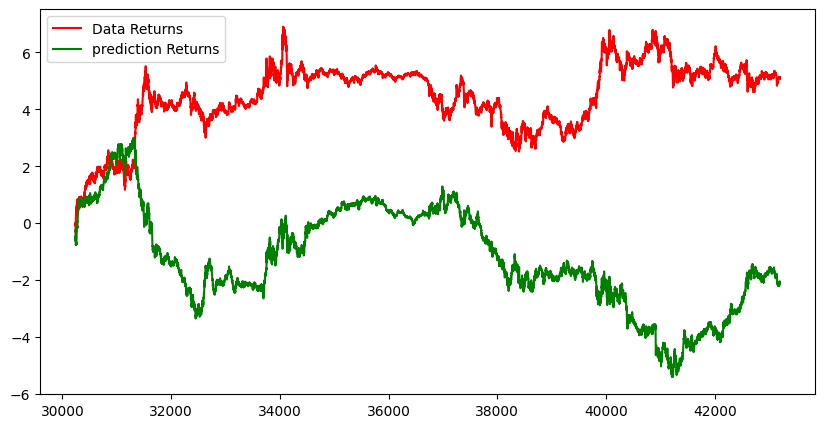

In [ ]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# Cumulative Returns
df['data_returns'] = np.log(df['close']/df['close'].shift(1))
Cum_data_returns = df[split:]['data_returns'].cumsum()*100

# Cumulative Strategy Returns
df['Strategy_returns'] = df['data_returns']* df['Predicted_Signal'].shift(1)
Cum_Strategy_returns = df[split:]['Strategy_returns'].cumsum()*100

# Plot the results to visualise the performance

plt.figure(figsize=(10,5))
plt.plot(Cum_data_returns, color='r',label = 'Data Returns')
plt.plot(Cum_Strategy_returns, color='g', label = 'prediction Returns')
plt.legend()
plt.show()

This clearly performed poorly

In [ ]:
# Calculate Sharpe ratio
Std = Cum_Strategy_returns.std()
Sharpe = (Cum_Strategy_returns - Cum_data_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -3.23


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
models = [LogisticRegression(), XGBClassifier()]
#model=XGBClassifier()
#model.fit(X_train, Y_train)
#print('Training Accuracy : ',accuracy_score(Y_train, XGBClassifier().predict(X_train)))
#print('Validation Accuracy : ',accuracy_score(Y_test, XGBClassifier().predict(X_test)))


for i in range(1):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ',accuracy_score(Y_train, models[i].predict(X_train)))
  print('Validation Accuracy : ',accuracy_score(Y_test, models[i].predict(X_test)))
  print()
  df['Predicted_Signal']=models[i].predict(X)

LogisticRegression() : 
Training Accuracy :  0.5000165349383247
Validation Accuracy :  0.49224596867525655



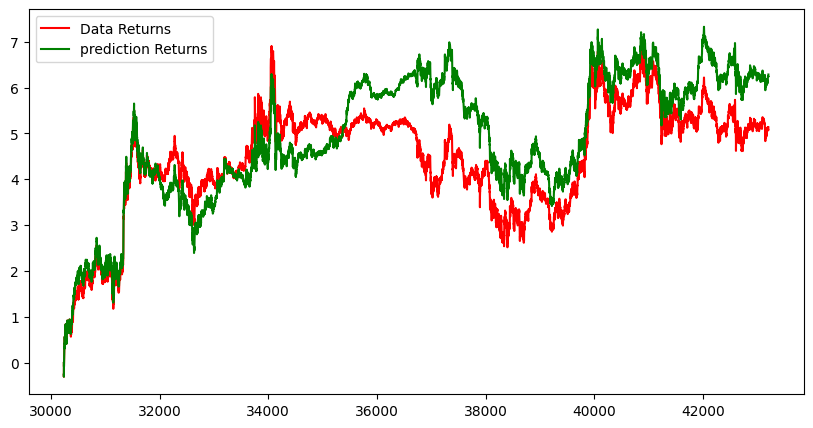

In [ ]:

# Cumulative Returns
df['data_returns'] = np.log(df['close']/df['close'].shift(1))
Cum_data_returns = df[split:]['data_returns'].cumsum()*100

# Cumulative Strategy Returns
df['Strategy_returns'] = df['data_returns']* df['Predicted_Signal'].shift(1)
Cum_Strategy_returns = df[split:]['Strategy_returns'].cumsum()*100

# Plot the results to visualise the performance

plt.figure(figsize=(10,5))
plt.plot(Cum_data_returns, color='r',label = 'Data Returns')
plt.plot(Cum_Strategy_returns, color='g', label = 'prediction Returns')
plt.legend()
plt.show()

In [ ]:
# Calculate Sharpe ratio
Std = Cum_Strategy_returns.std()
Sharpe = (Cum_Strategy_returns - Cum_data_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.32


Logistic regression definitely worked better, my next approach would be to try an LSTM (but couldn't figure out the code in time)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'high']
low_prices = df.loc[:,'low']
mid_prices = (high_prices+low_prices)/2.0

train_data = mid_prices[:split]
test_data = mid_prices[split:]

# Scale the data to be between 0 and 1

scaler = MinMaxScaler()
train_data = train_data.values.reshape(-1,1)
test_data = test_data.values.reshape(-1,1)

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['open_time','close'])

for i in range(0,len(data)):
    new_dataset["open_time"][i]=data['open_time'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:split,:]
valid_data=final_dataset[split]:,:]

new_dataset.index=new_dataset.open_time
new_dataset.drop("open_time",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
#inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
#inputs_data=inputs_data.reshape(-1,1)
#inputs_data=scaler.transform(inputs_data)

In [ ]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train,Y_train,epochs=1,batch_size=1,verbose=2)

In [ ]:
predicted_closing_price=lstm_model.predict(X_test)
#predicted_closing_price=scaler.inverse_transform(predicted_closing_price)